# Predict Bike-Sharing need in Metropolitan Area



Programming Language: R 3.5.1 in Jupyter Notebook

R Libraries used:
- ISLR
- reshape2
- ggplot2
- scales
- gridExtra
- moments
- dplyr
- caret

## Table of Contents

1. [Introduction](#sec_1)
2. [Data Exploration](#sec_2)
3. [Exploratory Data Analysis](#sec_3)
4. [Methodology](#sec_4)
5. [Model Development](#sec_5)
6. [Results and discussion](#sec_6)
7. [Conclusion](#sec_7)
8. [References](#sec_8)


## 1. Introduction<a class="anchor" id="sec_1"></a>

For this task, we will use a machine learning technique to predict bike-sharing needs in the metropolitan area. We aim to build to predict the count on rented bike require on a particular hour.
we have to solve two problems:
1. Predict the number of bikes require each hour.
2. Identify and justify the key factor based on statistical evidence.

For this task, we will use two file CSV files 
1. train.csv
2. test.csv


In [1]:
# Import required libraries
library(ISLR)
library(reshape2)
library(ggplot2)
library(scales)
library(gridExtra)
library(moments) 
library(dplyr)   
library(caret)


Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'gridExtra' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following object is masked from 'package:gridExtra':

    combine

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: lattice


## 2. Data Exploration<a class="anchor" id="sec_2"></a>
In this section, we will explore the data and find out information about each attribute such as type, value, range, etc.

In [2]:
# Load the training dataset
bike_data =  read.csv('train.csv')
test_data =  read.csv('test.csv')

In [3]:
# Display the dimensions
cat("The bike sharing dataset has ",dim(bike_data)[1]," records, each with",dim(bike_data)[2],'attributes.')
# Display name of attributes
cat("\nName of attributes :\n",names(bike_data))

The bike sharing dataset has  7008  records, each with 14 attributes.
Name of attributes :
 Date Rented.Bike.Count Hour Temperature Humidity Wind.speed Visibility Dew.point.temperature Solar.Radiation Rainfall Snowfall Seasons Holiday Functioning.Day

>* **Date** : day-month-year
>* **Rented.Bike.Count** : Count of bikes rented at each hour, the response variable 
>* **Hour** Hour of the day
>* **Temperature** Temperature in Celsius
>* **Humidity** in %
>* **Wind.speed** m/s
>* **Visibility** 10m
>* **Dew.point.temperature** Celsius
>* **Solar.Radiation** MJ/m2
>* **Rainfall**: mm
>* **Snowfall**: cm
>* **Seasons**: winter, spring, summer, autumn
>* **Holiday**: Holiday/No holiday, indicating if the corresponding date is a public holiday or not
>* **Functioning.Day**:NoFunc(Non Functional Hours), Fun(Functional hours), the variable indicates the days when the rental bike system does not operate.

In [4]:
# Changing the column names
col_names = c('date','rented_bike','hour','temperature','humidity','wind_speed','visibility','dew_temp','solar_rad','rainfall','snowfall','season','holiday','func_day')
colnames(bike_data) = col_names
cat("\nName of attributes :\n",names(bike_data))


Name of attributes :
 date rented_bike hour temperature humidity wind_speed visibility dew_temp solar_rad rainfall snowfall season holiday func_day

In [5]:
# Display the structure of dataset
str(bike_data)
# Inspect first few rows
head(bike_data)
# Inspect last few rows
tail(bike_data)
cat('Statistics for each attribute')
summary(bike_data)
cat('The number of unique values for each attributes are:')
sapply(bike_data, function(x) length(unique(x)) )

'data.frame':	7008 obs. of  14 variables:
 $ date       : Factor w/ 365 levels "1/1/18","1/10/18",..: 54 78 255 300 77 151 105 353 210 10 ...
 $ rented_bike: int  705 289 126 378 236 708 715 1001 502 17 ...
 $ hour       : int  14 14 5 9 17 10 8 1 20 18 ...
 $ temperature: num  18.3 12.1 1.8 10.4 2.4 18.2 21.1 18.9 10.7 22.2 ...
 $ humidity   : int  43 97 34 81 17 36 70 55 70 96 ...
 $ wind_speed : num  2.2 2 0.9 1.4 3.1 1 0.3 2.3 2.8 1.2 ...
 $ visibility : int  1509 177 1990 2000 1990 620 766 2000 236 673 ...
 $ dew_temp   : num  5.4 11.6 -12.4 7.2 -20.2 2.8 15.4 9.6 5.4 21.5 ...
 $ solar_rad  : num  2.43 0.2 0 0.36 0.78 1.99 0.9 0 0 0.09 ...
 $ rainfall   : num  0 0 0 0 0 0 0 0 0 3.5 ...
 $ snowfall   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ season     : Factor w/ 4 levels "Autumn","Spring",..: 2 2 1 2 4 2 3 1 2 3 ...
 $ holiday    : Factor w/ 2 levels "Holiday","No Holiday": 2 2 2 2 1 2 2 2 2 2 ...
 $ func_day   : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...


date,rented_bike,hour,temperature,humidity,wind_speed,visibility,dew_temp,solar_rad,rainfall,snowfall,season,holiday,func_day
13/3/18,705,14,18.3,43,2.2,1509,5.4,2.43,0,0,Spring,No Holiday,Yes
15/3/18,289,14,12.1,97,2.0,177,11.6,0.20,0,0,Spring,No Holiday,Yes
29/11/18,126,5,1.8,34,0.9,1990,-12.4,0.00,0,0,Autumn,No Holiday,Yes
4/4/18,378,9,10.4,81,1.4,2000,7.2,0.36,0,0,Spring,No Holiday,Yes
15/2/18,236,17,2.4,17,3.1,1990,-20.2,0.78,0,0,Winter,Holiday,Yes
20/4/18,708,10,18.2,36,1.0,620,2.8,1.99,0,0,Spring,No Holiday,Yes


,date,rented_bike,hour,temperature,humidity,wind_speed,visibility,dew_temp,solar_rad,rainfall,snowfall,season,holiday,func_day
7003,27/1/18,189,13,-6.6,27,2.1,1889,-22.5,1.24,0,0.3,Winter,No Holiday,Yes
7004,21/9/18,127,8,17.8,97,2.0,1284,17.3,0.09,4,0.0,Autumn,No Holiday,Yes
7005,11/2/18,58,3,-7.2,43,2.0,2000,-17.6,0.00,0,0.0,Winter,No Holiday,Yes
7006,30/3/18,115,4,9.9,67,1.1,820,4.0,0.00,0,0.0,Spring,No Holiday,Yes
7007,29/11/18,800,7,0.8,41,0.6,1298,-10.9,0.00,0,0.0,Autumn,No Holiday,Yes
7008,14/2/18,349,13,7.2,65,3.8,773,1.0,0.61,0,0.0,Winter,No Holiday,Yes


Statistics for each attribute

       date       rented_bike          hour        temperature    
 30/7/18 :  24   Min.   :   0.0   Min.   : 0.00   Min.   :-17.50  
 10/11/18:  23   1st Qu.: 188.0   1st Qu.: 5.75   1st Qu.:  3.40  
 18/11/18:  23   Median : 503.0   Median :11.00   Median : 13.60  
 19/8/18 :  23   Mean   : 703.2   Mean   :11.46   Mean   : 12.83  
 20/1/18 :  23   3rd Qu.:1063.0   3rd Qu.:17.00   3rd Qu.: 22.50  
 21/4/18 :  23   Max.   :3556.0   Max.   :23.00   Max.   : 39.40  
 (Other) :6869                                                    
    humidity       wind_speed     visibility        dew_temp      
 Min.   : 0.00   Min.   :0.00   Min.   :  27.0   Min.   :-30.600  
 1st Qu.:42.00   1st Qu.:0.90   1st Qu.: 944.8   1st Qu.: -4.700  
 Median :57.00   Median :1.50   Median :1693.0   Median :  5.000  
 Mean   :58.25   Mean   :1.72   Mean   :1436.0   Mean   :  4.029  
 3rd Qu.:74.00   3rd Qu.:2.30   3rd Qu.:2000.0   3rd Qu.: 14.800  
 Max.   :98.00   Max.   :7.40   Max.   :2000.0   Max.   : 26.8

The number of unique values for each attributes are:

date rented_bike        hour temperature    humidity  wind_speed 
        365        2032          24         540          89          64 
 visibility    dew_temp   solar_rad    rainfall    snowfall      season 
       1714         547         341          58          51           4 
    holiday    func_day 
          2           2

##### Summary of Attributes


|Attribute  |Type       |Sub-type  |Comments                                                                              |
|-----------|-----------|----------|--------------------------------------------------------------------------------------|
|date         |Categorical|Nominal   |date should of date type rather then factor|
|rented_bike   |Numerical  |Discrete|Target variable - values range from 0 to 3556. Value is right skew because mean is greater than median.| 
|hour   |Numerical  |Discrete  |Values range from 0 to 23 - the mean is 11.46.|
|temperature  |Numerical  |Continuous  |Values ranging from -17.50 to 39.4 celsius |
|humidity|Numerical  |Discrete|Ranges from 0 to 98 percent - could have outliers                                        |
|wind_speed   |Numerical  |Continuous|Ranges from 0.0 to 7.40|
|visibility |Numerical|discrete   |Value Ranges from 27 to 200 - data is left skewed because mean is less than median  |
|dew_temp  |Numerical|Continuous   |Ranges from -30.6 to 26.8 |
|solar_rad      |Numerical|Continuous   |Ranges from 0.0 to 3.5 MJ/m2 - data is right skewed|
|Rainfall   |Numerical  |Discrete  |Values range from 0 to 35 mm.|
|snowfall    |Numerical|Continuous   |Values range from 0 to 8.8 cm.|
|season    |Categorical|Ordinal   |Has 4 values- Autumn, spring, summer, and winter|
|Holiday    |Categorical|Nominal |Has 2 values- Holiday, and No holiday - 95% of data caputered on no holiday|
|func_day    |Categorical|Nominal |Has 2 values- Yes, and No - 96% of data caputered on functional day|


1. Date column has the correct count of unique values because the maximum date count could be 365 or 355.
2. Hour column unique count is correct because the maximum hour value could be 24.
3. Season value is correct.

In [6]:
# Converting the date column type to date
bike_data$date =  as.Date(bike_data$date, format="%d/%m/%y")
sapply(bike_data, class)
head(bike_data)

date rented_bike        hour temperature    humidity  wind_speed 
     "Date"   "integer"   "integer"   "numeric"   "integer"   "numeric" 
 visibility    dew_temp   solar_rad    rainfall    snowfall      season 
  "integer"   "numeric"   "numeric"   "numeric"   "numeric"    "factor" 
    holiday    func_day 
   "factor"    "factor"

date,rented_bike,hour,temperature,humidity,wind_speed,visibility,dew_temp,solar_rad,rainfall,snowfall,season,holiday,func_day
2018-03-13,705,14,18.3,43,2.2,1509,5.4,2.43,0,0,Spring,No Holiday,Yes
2018-03-15,289,14,12.1,97,2.0,177,11.6,0.20,0,0,Spring,No Holiday,Yes
2018-11-29,126,5,1.8,34,0.9,1990,-12.4,0.00,0,0,Autumn,No Holiday,Yes
2018-04-04,378,9,10.4,81,1.4,2000,7.2,0.36,0,0,Spring,No Holiday,Yes
2018-02-15,236,17,2.4,17,3.1,1990,-20.2,0.78,0,0,Winter,Holiday,Yes
2018-04-20,708,10,18.2,36,1.0,620,2.8,1.99,0,0,Spring,No Holiday,Yes


## 3. Exploratory Data Analysis<a class="anchor" id="sec_3"></a>

No id variables; using all as measure variables
Warning message:
"attributes are not identical across measure variables; they will be dropped"

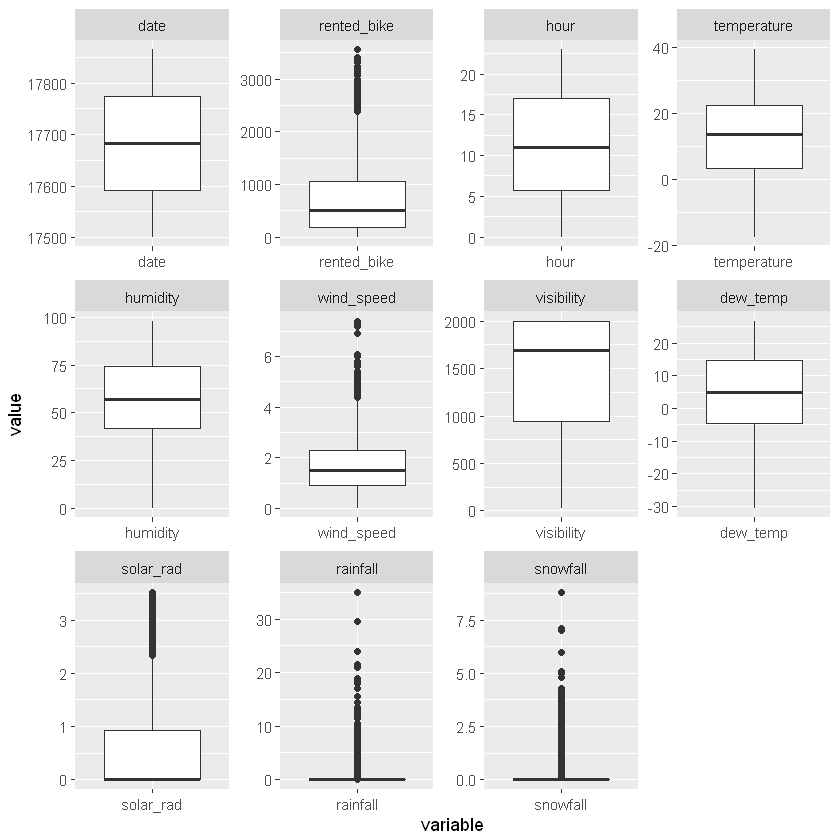

In [7]:
# Analyse the numerical variable using box plot
melted_data =  melt(as.data.frame(bike_data[,c(-12,-13,-14)]))
ggplot(melted_data, aes(x=variable, y=value))+
    facet_wrap(~variable, scale="free")+
    geom_boxplot()+
    scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})

According to the above boxplot:
1. Rented_bike, wind_speed, and solar_rad have some outliers
2. Rainfall and snowfall have a lot of outliers.

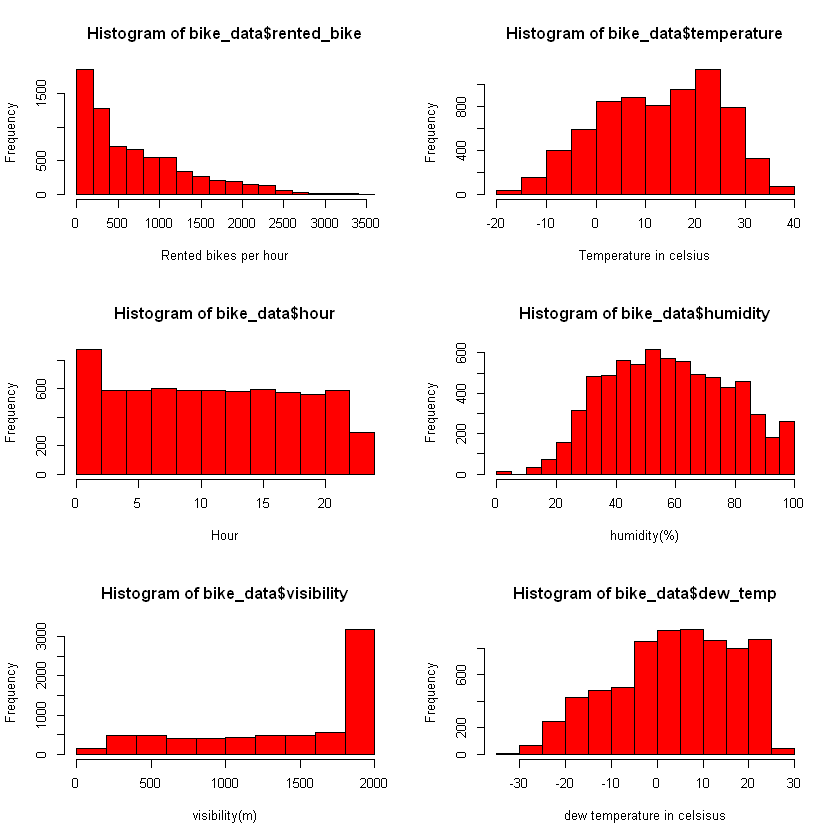

In [8]:
#  Ploting histogram and bar chart
par(mfrow = c(3,2))
hist(bike_data$rented_bike,col='red', xlab ='Rented bikes per hour')
hist(bike_data$temperature,col='red', xlab='Temperature in celsius')
hist(bike_data$hour,col='red', xlab='Hour')
hist(bike_data$humidity, col='red',xlab='humidity(%)')
hist(bike_data$visibility,col='red', xlab='visibility(m)')
hist(bike_data$dew_temp,col='red', xlab='dew temperature in celsisus')

According to the above histogram:
1. rented_bike is highly right-skewed with max value 3500
2. Temperature is a little bit left-skewed
3. Hour attribute is almost uniform
4. humidity is somewhat left-skewed
5. visibility and dew_temp is highly left-skewed 

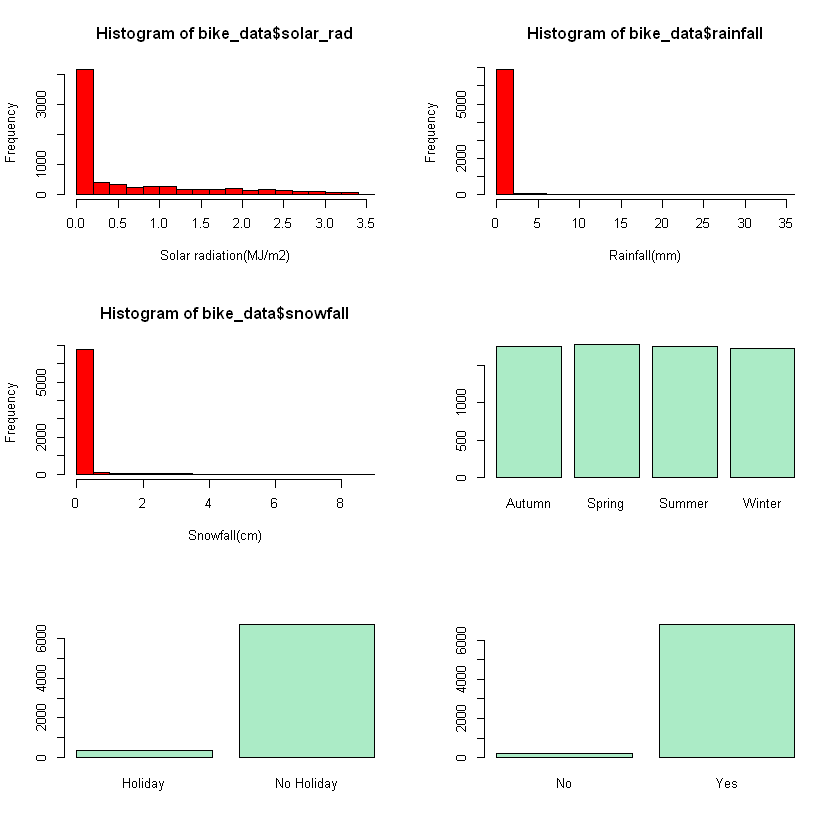

In [9]:
par(mfrow = c(3,2))
hist(bike_data$solar_rad, col='red',xlab='Solar radiation(MJ/m2)')
hist(bike_data$rainfall, col='red', xlab='Rainfall(mm)')
hist(bike_data$snowfall,col='red', xlab='Snowfall(cm)')
barplot(table(bike_data$season),col='#ABEBC6',)
barplot(table(bike_data$holiday),col='#ABEBC6',)
barplot(table(bike_data$func_day),col='#ABEBC6',)

From the above histogram and barplot we can say:
1. solar radiation is highly right-skewed
2. Rainfall is somewhat right-skewed
3. Snowfall is right-skewed
4. Data is evenly distributed among four seasons
5. 95% the data is collected on no holiday
5. 96% the data is collected on a functional day

Since a lot of attributes are skewed, so we are going to re-plot the histogram using log-scale/sqrt/inverse because regression models can make better predictions if the explanatory and target variable is normally distributed.

Skewness of rented bike: 1.137987
Skewness after log transformation -1.811981
Skewness after sqrt transformation 0.2376743
Skewness after inverse transformation 5.094864

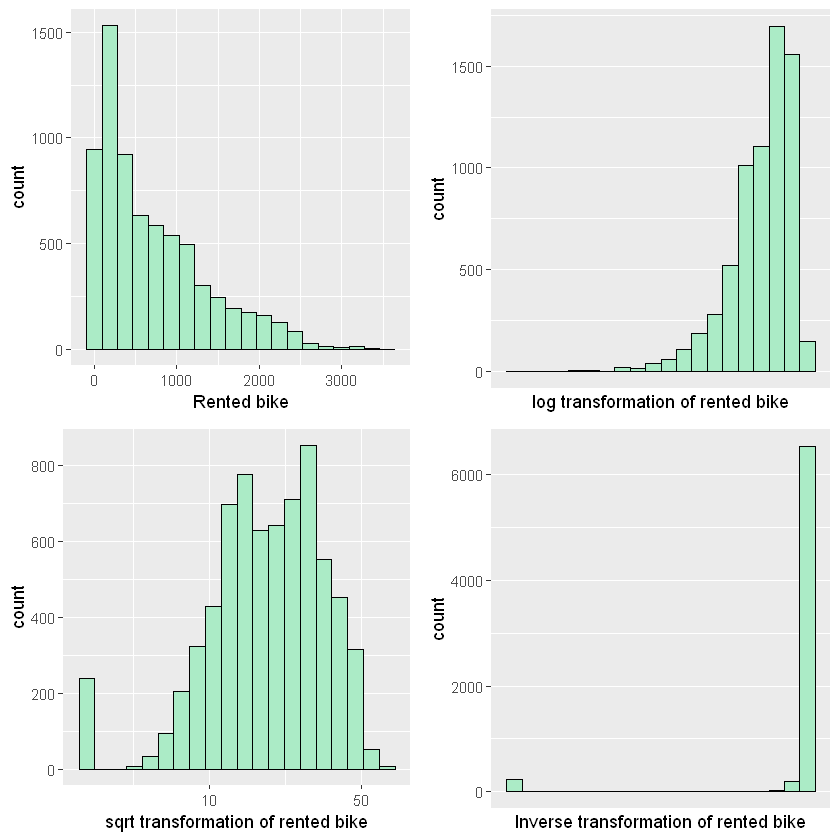

In [10]:
# Calculate the skewness using different transformation
a = bike_data$rented_bike
log = sapply(a, function(x) log10(x+1))
sqrt = sapply(a, function(x) sqrt(x))
inverse = sapply(a, function(x) 1/(x+1))
df = data.frame(a,log,sqrt, inverse)                 
cat('Skewness of rented bike:',skewness(a, na.rm = TRUE))
cat('\nSkewness after log transformation',skewness(log, na.rm = TRUE))
cat('\nSkewness after sqrt transformation',skewness(sqrt, na.rm = TRUE))                
cat('\nSkewness after inverse transformation',skewness(inverse, na.rm = TRUE))                

options(warn=-1)
p1= ggplot(aes(x=a), data=df)+
    geom_histogram(bins=20, colour='black', fill='#ABEBC6')+
    xlab('Rented bike')
p2= ggplot(aes(x=log), data=df)+
    geom_histogram(bins=20, colour='black', fill='#ABEBC6')+
    scale_x_log10(labels=comma,breaks=c(10,50,100,300,800,100))+
    xlab('log transformation of rented bike')
p3= ggplot(aes(x=sqrt), data=df)+
    geom_histogram(bins=20, colour='black', fill='#ABEBC6')+
    scale_x_sqrt(labels=comma,breaks=c(10,50,100,300,800,100))+
    xlab('sqrt transformation of rented bike')
p4= ggplot(aes(x=inverse), data=df)+
    geom_histogram(bins=20, colour='black', fill='#ABEBC6')+
    scale_x_reverse(labels=comma,breaks=c(10,50,100,300,800,100))+
    xlab('Inverse transformation of rented bike')
grid.arrange(p1, p2, p3,p4, ncol=2, nrow=2)

From the above skewness values and histograms, we can conclude that sqrt transformation is more suitable for the rented bike.

Skewness of without transformation: 0.05173148
Skewness after log transformation -2.115412
Skewness after sqrt transformation -0.4951599
Skewness after inverse transformation 21.79142

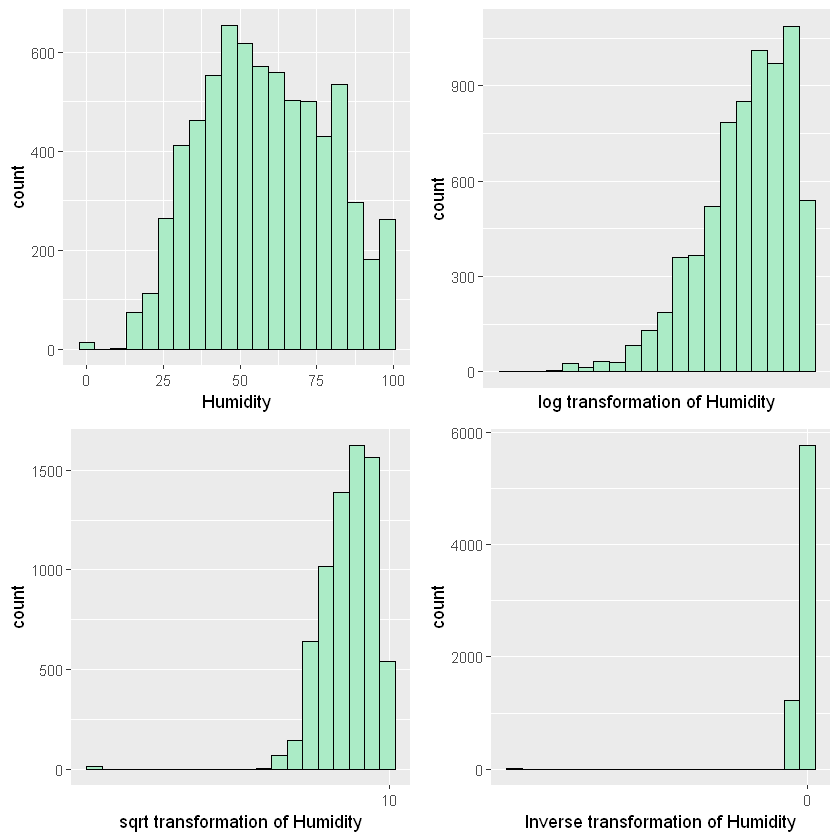

In [11]:
# Calculate the skewness using different transformation
a = bike_data$humidity
log = sapply(a, function(x) log10(x+1))
sqrt = sapply(a, function(x) sqrt(x))
inverse = sapply(a, function(x) 1/(x+1))
df = data.frame(a,log,sqrt, inverse)
cat('Skewness of without transformation:',skewness(a, na.rm = TRUE))
cat('\nSkewness after log transformation',skewness(log, na.rm = TRUE))
cat('\nSkewness after sqrt transformation',skewness(sqrt, na.rm = TRUE))                
cat('\nSkewness after inverse transformation',skewness(inverse, na.rm = TRUE))                

options(warn=-1)
par(mfrow = c(3,2))
p1= ggplot(aes(x=a), data=df)+
    geom_histogram(bins=20, colour='black', fill='#ABEBC6')+
    xlab('Humidity')
p2= ggplot(aes(x=log), data=df)+
    geom_histogram(bins=20, colour='black', fill='#ABEBC6')+
    scale_x_log10(labels=comma,breaks=c(10,50,100,300,800,1000))+
    xlab('log transformation of Humidity')
p3= ggplot(aes(x=sqrt), data=df)+
    geom_histogram(bins=20, colour='black', fill='#ABEBC6')+
    scale_x_sqrt(labels=comma,breaks=c(10,50,100,300,800,1000))+
    xlab('sqrt transformation of Humidity')
p4= ggplot(aes(x=inverse), data=df)+
    geom_histogram(bins=20, colour='black', fill='#ABEBC6')+
    scale_x_reverse(labels=comma,breaks=c(0,3,5,10))+
    xlab('Inverse transformation of Humidity')
grid.arrange(p1, p2, p3, p4, ncol=2, nrow=2)

From the above skewness values and histogram, we can conclude that no transformation is required

Skewness without transformation: -0.7042259
Skewness after log transformation -0.616596
Skewness after sqrt transformation -1.019968
Skewness after inverse transformation 1.088431

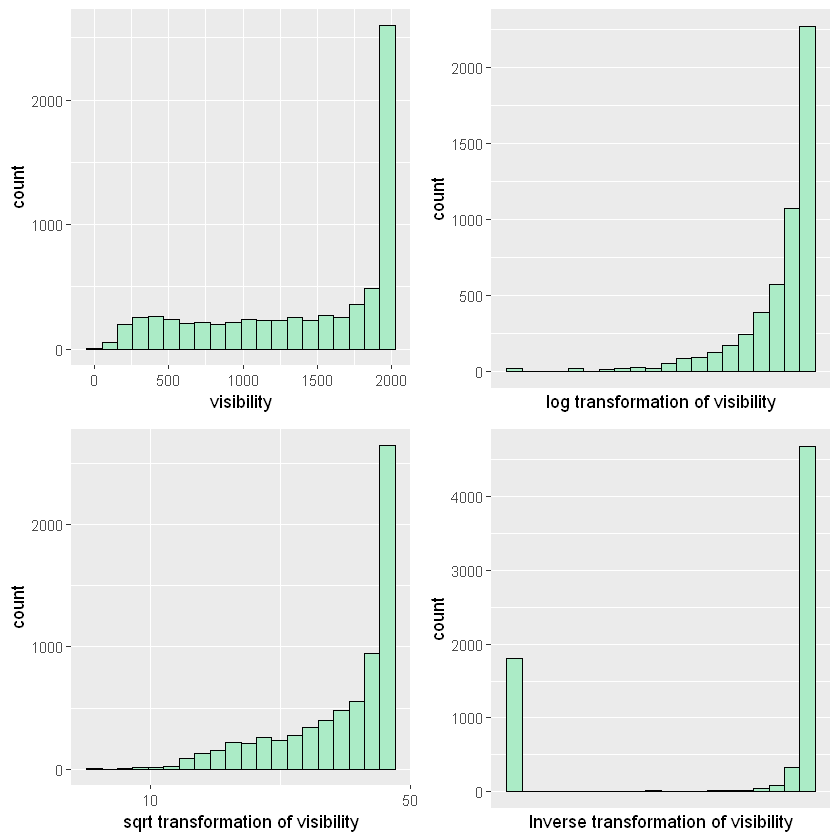

In [12]:
# Calculate the skewness using different transformation
a = bike_data$visibility
log = sapply(a, function(x) log10(max(a+1) -x))
sqrt = sapply(a, function(x) sqrt(x))
inverse = sapply(a, function(x) 1/(max(a+1)-x))
df = data.frame(a,log,sqrt, inverse)
    
cat('Skewness without transformation:',skewness(a, na.rm = TRUE))
cat('\nSkewness after log transformation',skewness(log, na.rm = TRUE))
cat('\nSkewness after sqrt transformation',skewness(sqrt, na.rm = TRUE))                
cat('\nSkewness after inverse transformation',skewness(inverse, na.rm = TRUE))                

options(warn=-1)
p1= ggplot(aes(x=a), data=bike_data)+
    geom_histogram(bins=20, colour='black', fill='#ABEBC6')+
    xlab('visibility')
p2= ggplot(aes(x=log), data=df)+
    geom_histogram(bins=20, colour='black', fill='#ABEBC6')+
    scale_x_log10(labels=comma,breaks=c(10,50,100,300,800,100))+
    xlab('log transformation of visibility')
p3= ggplot(aes(x=sqrt), data=df)+
    geom_histogram(bins=20, colour='black', fill='#ABEBC6')+
    scale_x_sqrt(labels=comma,breaks=c(10,50,100,300,800,100))+
    xlab('sqrt transformation of visibility')
p4= ggplot(aes(x=inverse), data=df)+
    geom_histogram(bins=20, colour='black', fill='#ABEBC6')+
    scale_x_reverse(labels=comma,breaks=c(10,50,100,300,800,100))+
    xlab('Inverse transformation of visibility')
grid.arrange(p1, p2, p3, p4, ncol=2, nrow=2)

From the above skewness values and histogram, we can conclude that log transformation is more suitable for Visibility

Skewness without transformation: 14.79495
Skewness after log transformation 6.498368
Skewness after sqrt transformation 6.711054
Skewness after inverse transformation -4.711304

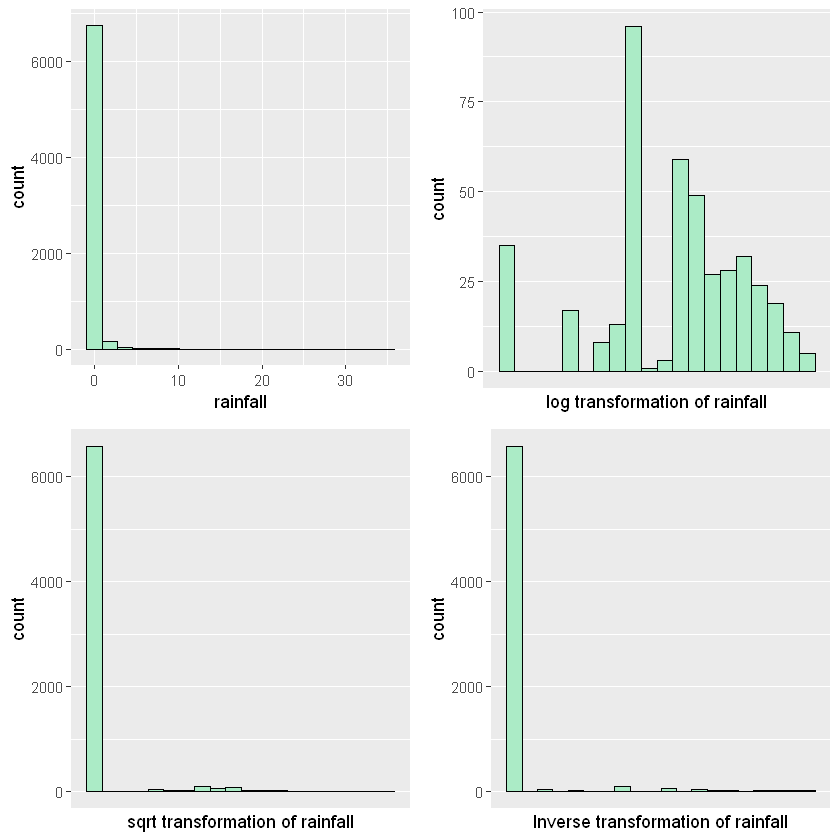

In [13]:
# Calculate the skewness using different transformation
a = bike_data$rainfall
log = sapply(a, function(x) log10(x+1))
sqrt = sapply(a, function(x) sqrt(x))
inverse = sapply(a, function(x) 1/(x+1))
df = data.frame(a,log,sqrt, inverse)
    
cat('Skewness without transformation:',skewness(a, na.rm = TRUE))
cat('\nSkewness after log transformation',skewness(log, na.rm = TRUE))
cat('\nSkewness after sqrt transformation',skewness(sqrt, na.rm = TRUE))                
cat('\nSkewness after inverse transformation',skewness(inverse, na.rm = TRUE))                

options(warn=-1)
p1= ggplot(aes(x=a), data=bike_data)+
    geom_histogram(bins=20, colour='black', fill='#ABEBC6')+
    xlab('rainfall')
p2= ggplot(aes(x=log), data=df)+
    geom_histogram(bins=20, colour='black', fill='#ABEBC6')+
    scale_x_log10(labels=comma,breaks=c(10,50,100,300,800,100))+
    xlab('log transformation of rainfall')
p3= ggplot(aes(x=sqrt), data=df)+
    geom_histogram(bins=20, colour='black', fill='#ABEBC6')+
    scale_x_sqrt(labels=comma,breaks=c(10,50,100,300,800,100))+
    xlab('sqrt transformation of rainfall')
p4= ggplot(aes(x=inverse), data=df)+
    geom_histogram(bins=20, colour='black', fill='#ABEBC6')+
    scale_x_reverse(labels=comma,breaks=c(10,50,100,300,800,100))+
    xlab('Inverse transformation of rainfall')
grid.arrange(p1, p2, p3, p4, ncol=2, nrow=2)

From the above skewness values and histogram, we can conclude that log transformation is more suitable for Rainfall

#### 3.1 Explore the relation between variables

corrplot 0.84 loaded


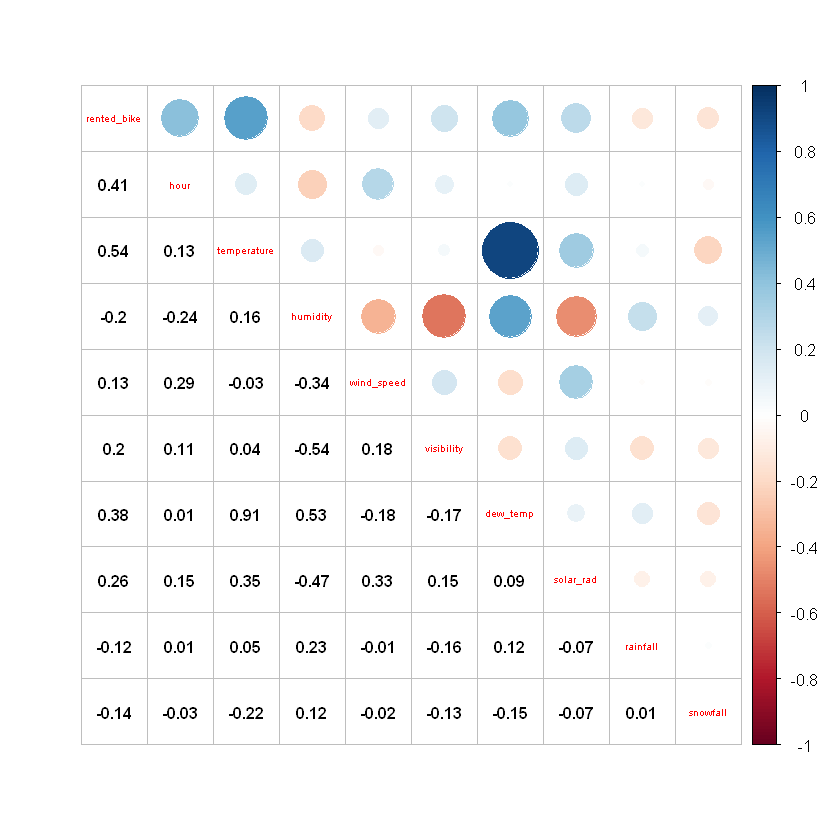

In [14]:
columns = c('rented_bike', 'hour', 'temperature', 'humidity', 'wind_speed', 'visibility', 'dew_temp', 'solar_rad', 'rainfall', 'snowfall')
library(corrplot)
corrplot.mixed(cor(bike_data[,columns]), lower.col = "black", number.cex = .8, tl.cex=.5)

From the above correlation graph we can depict:
- Temperature and dew_temperature are highly positively correlated.
-  Hour is positively associated with temperature, wind_speed. But it is negatively associated with humidity.
- Temperature is positively correlated to humidity, and solar_rad. But it is negatively correlated to snowfall.
- Humidity is negatively correlated to wind_speed, visibility, and solar_rad. Humidity is positively associated with dew_temp.

`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


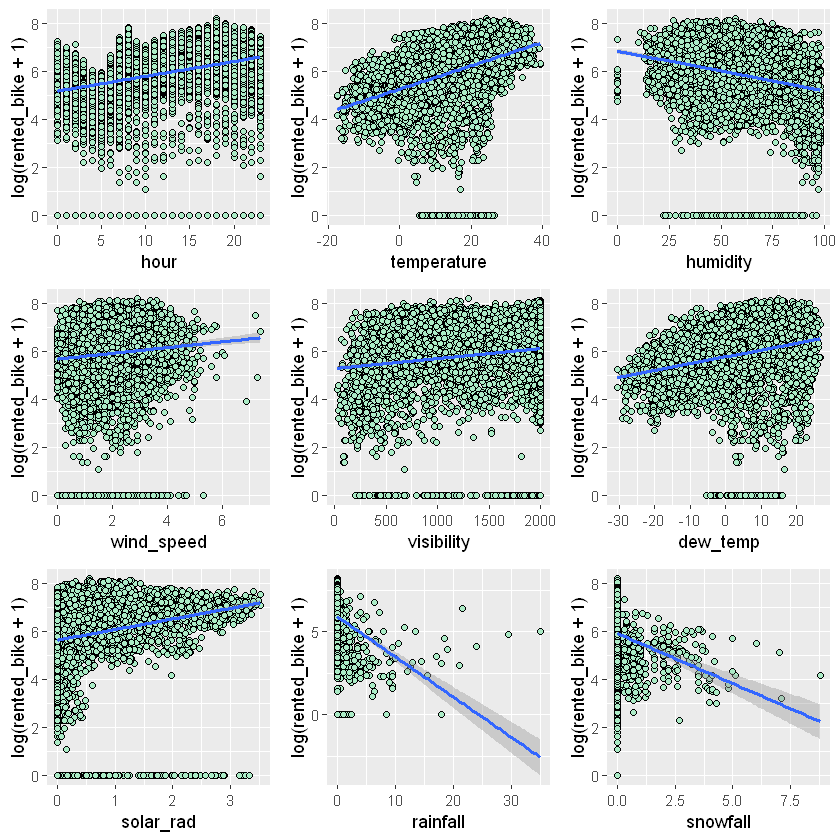

In [15]:
columns = c( 'hour', 'temperature', 'humidity', 'wind_speed', 'visibility', 'dew_temp', 'solar_rad', 'rainfall', 'snowfall')
p = c()
i=1
for(col in columns){
   p[[i]] =ggplot(aes_string(x=col,y='log(rented_bike + 1)'), data=bike_data)+
    geom_point(pch=21,colour='black', fill='#ABEBC6')+
    geom_smooth(method='lm')+
    xlab(col)
    i = i+1
}
grid.arrange(p[[1]], p[[2]], p[[3]], p[[4]],p[[5]], p[[6]], p[[7]], p[[8]],p[[9]], ncol=3, nrow=3)

The log transformation of rented_bike variable results into more linear interaction with other independent variable.

### 3.2 Analyse categorical variables

How many bikes rented according to season?

season,rented_bike
Autumn,1410496
Spring,1299747
Summer,1830884
Winter,386553


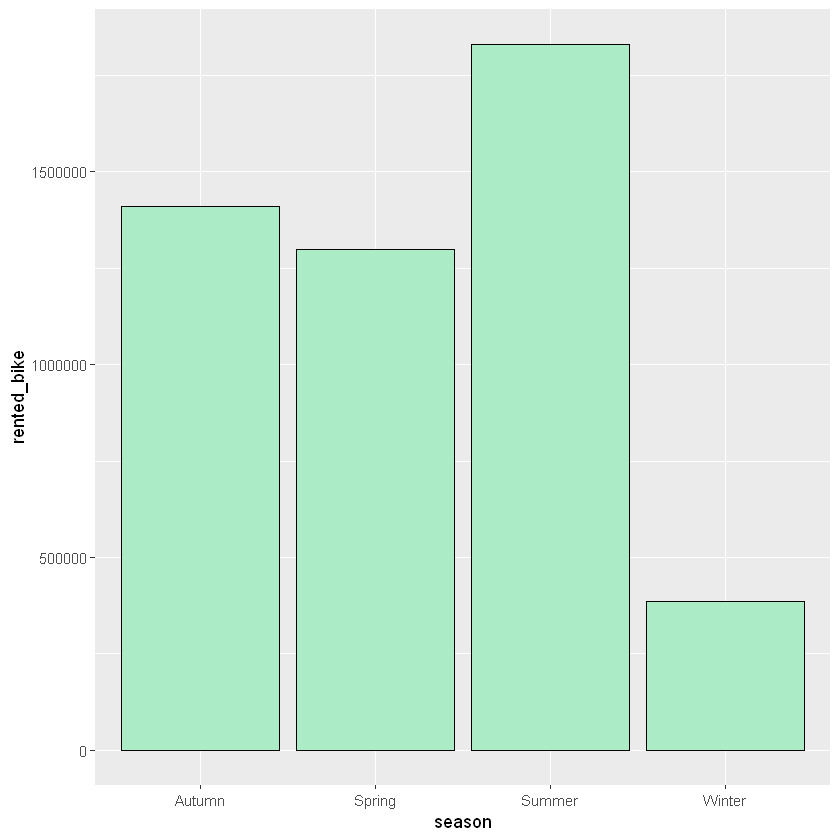

In [16]:
bike_group_by_season = bike_data %>%
    group_by(season) %>%
    summarize(rented_bike = sum(rented_bike))
ggplot(data=bike_group_by_season, aes(x=season, y=rented_bike)) +
  geom_bar(stat="identity", fill = '#ABEBC6',color='black')
bike_group_by_season

According to the above bar plot, we can say that mostly the bikes are rented in summer. People don't prefer to rent a bike in winter.

Let's analyses the rented bike and hour relation?

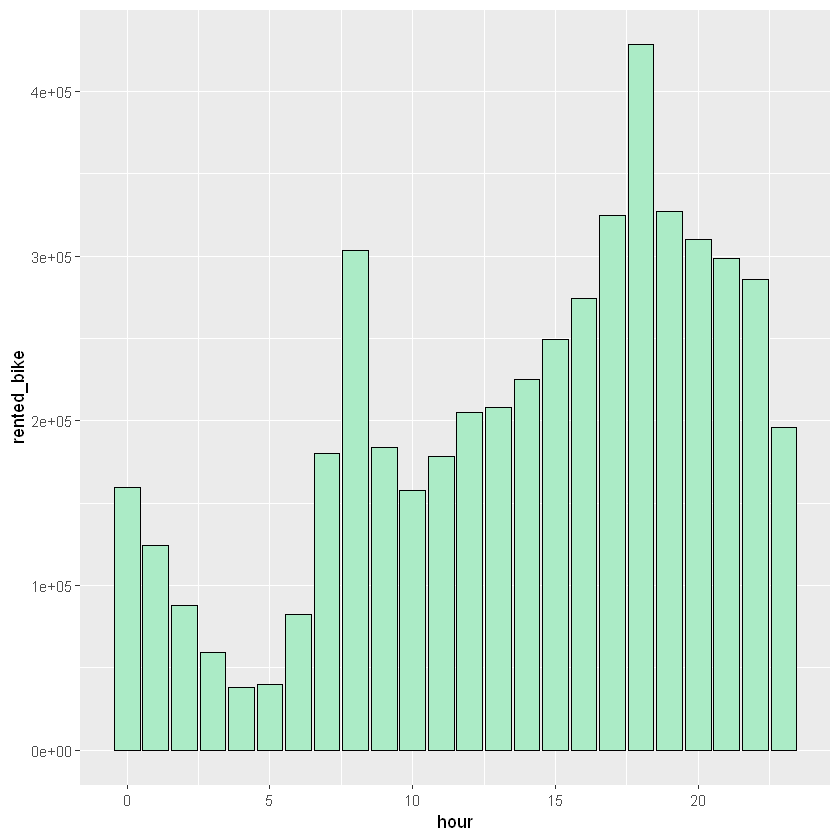

In [17]:
bike_group_by_hour = bike_data %>%
    group_by(hour) %>%
    summarize(rented_bike = sum(rented_bike))
ggplot(data=bike_group_by_hour, aes(x=hour, y=rented_bike)) +
  geom_bar(stat="identity", fill = '#ABEBC6',color='black')

From the above bar plot, we can conclude that:
1. The maximum number of bikes are rented at 18 clocks.
2. The minimum number of bikes are rented at 4 clocks.
3. Local maxima are observed at 8 clocks. People rent a bike around 8 clocks.
4. In the evening time bike renting is high and we can depict that most people prefer to rent the bike in the evening time.

## 4. Methodology
From the data exploration and Exploratory Data Analysis section, we can conclude that the response variable has a relation with independent variables. so our first approach is to predict the rented bike count using linear regression with all the given variables. Moreover, we have discovered that the target variable(rented_bike) is not normally distributed, so we are going to use log transformation and then use the stepwise function to remove an insignificant variable. 
For our second model, we will use the Random forest. For comparison, we have used R-square and RMSE.

## 5.  Model Development
### 5.1 Method 1: Linear Regression
#### 5.1.1 Using all the variables for prediction
A Linear regression model is fitted using the dependent and independent variable.

In [18]:
# Linear model using all the variable
linear_model =  lm(rented_bike ~ ., data=bike_data )
summary(linear_model)


Call:
lm(formula = rented_bike ~ ., data = bike_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1152.8  -277.6   -54.8   209.7  2235.5 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.531e+04  3.530e+03   7.170 8.26e-13 ***
date              -1.428e+00  1.980e-01  -7.211 6.16e-13 ***
hour               2.749e+01  8.230e-01  33.403  < 2e-16 ***
temperature        1.748e+01  4.051e+00   4.315 1.62e-05 ***
humidity          -1.062e+01  1.137e+00  -9.334  < 2e-16 ***
wind_speed         2.064e+01  5.730e+00   3.602 0.000318 ***
visibility         1.072e-02  1.102e-02   0.972 0.330906    
dew_temp           1.017e+01  4.237e+00   2.400 0.016437 *  
solar_rad         -7.872e+01  8.520e+00  -9.240  < 2e-16 ***
rainfall          -5.510e+01  4.614e+00 -11.941  < 2e-16 ***
snowfall           4.088e+01  1.236e+01   3.307 0.000949 ***
seasonSpring      -3.930e+02  3.964e+01  -9.914  < 2e-16 ***
seasonSummer      -2.790e+02  2.699e+01 -10

from above linear model we can conclude that:

-  The Adjusted R-square is 0.55 which means that this model explains 55% of variablility of the dataset.
- F-statistic >> 1 indicates that the response variable and explanatory vairable have strong relationship. Moreover, the model has p-value equal to 2.2e^-16 that reject Null-Hypothesis.
- Visibility has p-value greater than 0.05 which means visibility is not significate.

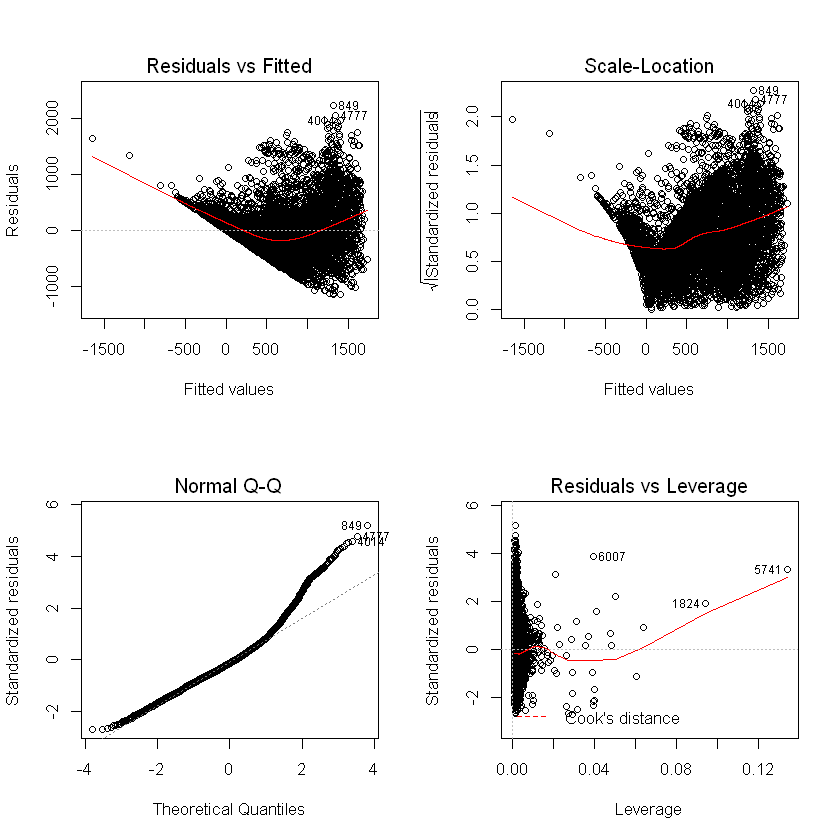

In [19]:
par(mfcol=c(2,2))
plot(linear_model)

From the above plots, we can conclude that:
1. The **residual vs fitted** plot shows that the residuals are not linear. The plot clearly shows a non-linear pattern.
2. The **normal Q-Q plot** shows that the residual is not normally distributed because the point wasn't lying on the straight line.
3. The **scale-location plot** represents the variance of residuals along with predictors. The above plot shows that variance is not spread equally. Most of the points lying on the right side.
4. The **residual-leverage plot** represent the outliers and influence point. In the above plot, the cook's distance line is barely visible so we don't have any influential cases.


#### 5.1.2 Using Log Transformation on response variable

As we have seen in the data exploration section that the rented_bike variable is right-skewed, so we are required to apply log transformation on the rented_bike variable to make it normalized.

In [20]:
log_linear_model =  lm(log10(rented_bike+1) ~ ., data=bike_data)
summary(log_linear_model)


Call:
lm(formula = log10(rented_bike + 1) ~ ., data = bike_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.09863 -0.15037  0.02675  0.18334  2.67037 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.440e+01  2.589e+00   5.562 2.76e-08 ***
date              -7.803e-04  1.452e-04  -5.373 7.99e-08 ***
hour               1.797e-02  6.036e-04  29.778  < 2e-16 ***
temperature       -9.211e-03  2.971e-03  -3.101  0.00194 ** 
humidity          -1.468e-02  8.340e-04 -17.604  < 2e-16 ***
wind_speed        -3.681e-03  4.202e-03  -0.876  0.38100    
visibility         1.237e-06  8.082e-06   0.153  0.87837    
dew_temp           2.923e-02  3.107e-03   9.406  < 2e-16 ***
solar_rad         -2.348e-03  6.248e-03  -0.376  0.70709    
rainfall          -8.639e-02  3.384e-03 -25.531  < 2e-16 ***
snowfall          -3.571e-03  9.067e-03  -0.394  0.69376    
seasonSpring      -2.812e-01  2.907e-02  -9.671  < 2e-16 ***
seasonSummer      -1.9

From the above model, we can conclude that:
- The log transformation is performing significantly good.
- The adjusted R-square is improved to 0.78
- The Residual standard error was reduced drastically.
- F-statistic is way greater than 1.

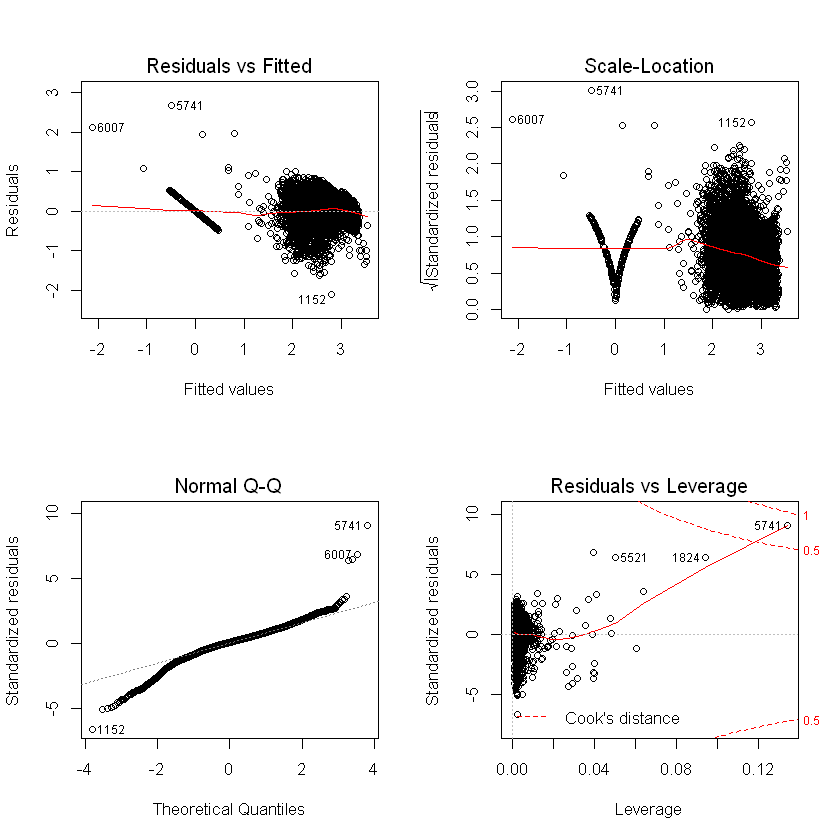

In [21]:
par(mfcol=c(2,2))
plot(log_linear_model)

From the above plots, we can conclude that:
1. The **residual vs fitted** plot clearly shows that the residuals are linearly fitted.
2. The **normal Q-Q plot** shows that the residual is mostly normal distributed.
3. The **scale-location plot** represents the variance of residuals along with predictors. The above plot shows that variance is not spread equally. Most of the points lying on the right side.
4. The **residual-leverage plot** represent the outliers and influence point. In the above plot, point 5741 is an influence point.


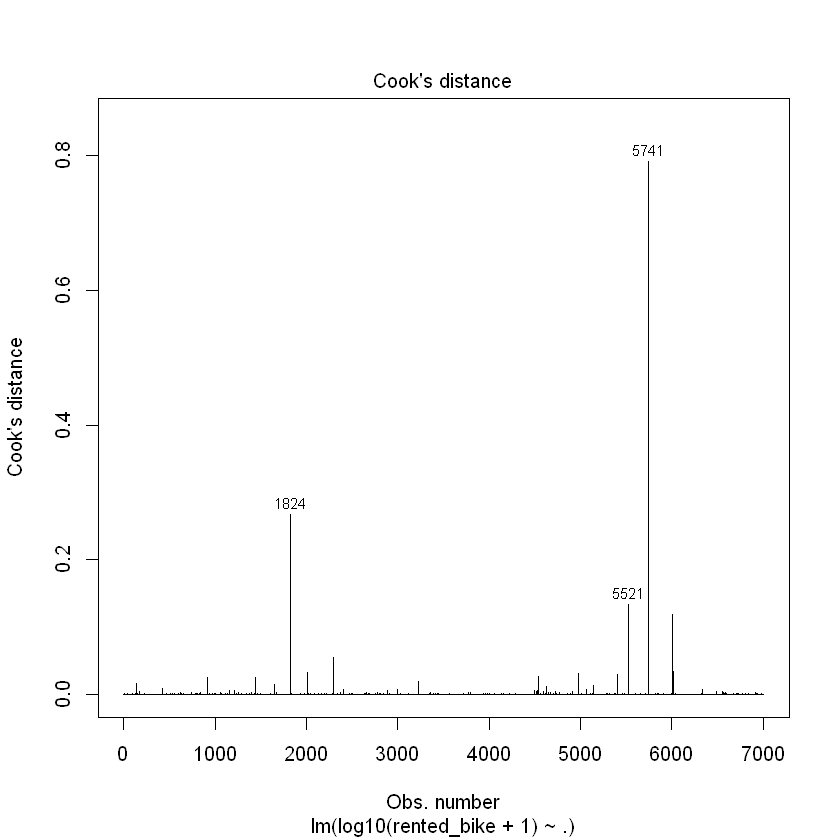

In [22]:
plot(log_linear_model, which = 4)

#### 5.1.3 Removing the influencial point

In [23]:
model1_data = bike_data[-5741,]
log_linear_model =  lm(log10(rented_bike+1) ~ ., data=model1_data)
summary(log_linear_model)


Call:
lm(formula = log10(rented_bike + 1) ~ ., data = model1_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.09890 -0.15053  0.02582  0.18259  2.32571 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.432e+01  2.574e+00   5.565 2.72e-08 ***
date              -7.774e-04  1.444e-04  -5.384 7.51e-08 ***
hour               1.808e-02  6.002e-04  30.118  < 2e-16 ***
temperature       -8.414e-03  2.955e-03  -2.848  0.00442 ** 
humidity          -1.430e-02  8.303e-04 -17.229  < 2e-16 ***
wind_speed        -3.488e-03  4.178e-03  -0.835  0.40374    
visibility         1.639e-07  8.036e-06   0.020  0.98373    
dew_temp           2.819e-02  3.091e-03   9.119  < 2e-16 ***
solar_rad         -2.001e-03  6.212e-03  -0.322  0.74733    
rainfall          -9.835e-02  3.612e-03 -27.230  < 2e-16 ***
snowfall          -4.119e-03  9.015e-03  -0.457  0.64771    
seasonSpring      -2.824e-01  2.890e-02  -9.769  < 2e-16 ***
seasonSummer      -1

After removing the influencly point, the adjusted R-squared improved and Residual standarded error is reduced.

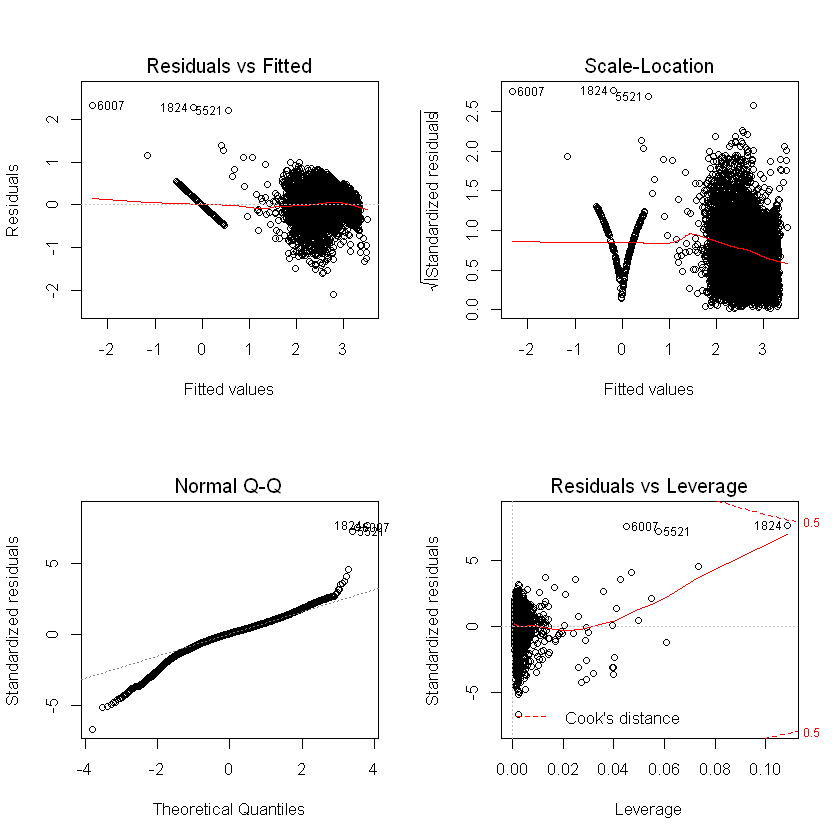

In [24]:
par(mfcol=c(2,2))
plot(log_linear_model)

No more influencly points in the data set

#### 5.1.4 subset selection


In [25]:

# Set seed for reproducibility
set.seed(1)
# Set up repeated k-fold cross-validation
train.control <- trainControl(method = "cv", number = 10)

# Train the model in backward selection
step_bck <- train(log10(rented_bike+1) ~., data = model1_data,
                    method = "leapBackward", 
                    tuneGrid = data.frame(nvmax = 1:14),
                    trControl = train.control
                    )

# Train the model in forward selection
step_fwd <- train(log10(rented_bike+1) ~., data = model1_data,
                    method = "leapForward", 
                    tuneGrid = data.frame(nvmax = 1:14),
                    trControl = train.control
                    )

# Train the model in  stepwise selection
stepwise <- train(log10(rented_bike+1) ~., data = model1_data,
                    method = "leapSeq", 
                    tuneGrid = data.frame(nvmax = 1:14),
                    trControl = train.control
                    )

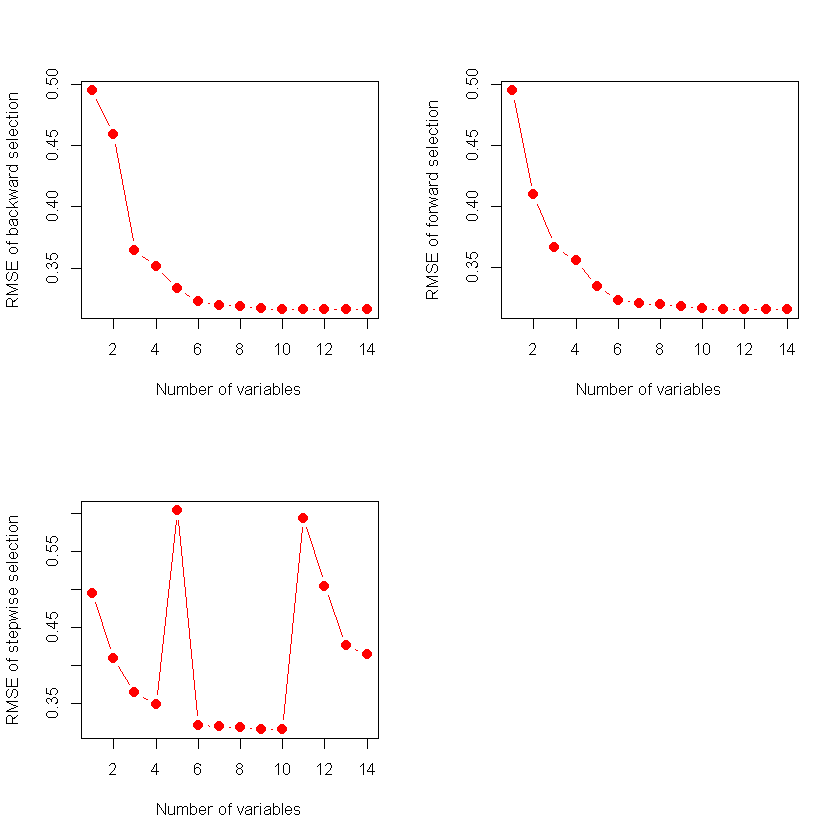

In [26]:
par(mfrow = c(2,2))

plot(y=step_bck$result$RMSE,
     x= step_bck$result$nvmax,
     col='red', 
     cex=2, 
     pch=20, 
     type='b',
    xlab='Number of variables',
    ylab='RMSE of backward selection')
plot(y=step_fwd$result$RMSE,
     x= step_fwd$result$nvmax,
     col='red', 
     cex=2, 
     pch=20, 
     type='b',
    xlab='Number of variables',
    ylab='RMSE of forward selection')

plot(y=stepwise$result$RMSE,
     x= stepwise$result$nvmax,
     col='red', 
     cex=2, 
     pch=20, 
     type='b',
    xlab='Number of variables',
    ylab='RMSE of stepwise selection')

In [27]:
# Minimum RMSE in each subset selecting 
RMSE = c(min(step_bck$result$RMSE),
min(step_fwd$result$RMSE),
min(stepwise$result$RMSE))

# number of variable corresponding to minimum RMSE
RMSE_variable = c(which.min(step_bck$result$RMSE),
which.min(step_fwd$result$RMSE),
which.min(stepwise$result$RMSE))

# Maximum R-squared in each subset selecting
Rsquared = c(max(step_bck$result$Rsquared),
max(step_fwd$result$Rsquared),
max(stepwise$result$Rsquared))

# Number of variable corresponsding to maximum R-squared
Rsquared_variable = c(which.max(step_bck$result$Rsquared),
which.max(step_fwd$result$Rsquared),
which.max(stepwise$result$Rsquared))

# Minimum standard deviation in R-squared in each subset selecting
RsquaredSD = c(min(step_bck$result$RsquaredSD),
min(step_fwd$result$RsquaredSD),
min(stepwise$result$RsquaredSD))

# Minimum standard deviation in R-squared in each subset selecting
RsquaredSD_variable = c(which.min(step_bck$result$RsquaredSD),
which.min(step_fwd$result$RsquaredSD),
which.min(stepwise$result$RsquaredSD))

compare = data.frame('rmse'= RMSE,
                     'variable_rmse'=RMSE_variable,
                     'Rsquared'=Rsquared,
                     'variable_rmse'= Rsquared_variable,
                     'RsquaredSD'=RsquaredSD,
                      'variabel_RsquaredSD'=RsquaredSD_variable)
row.names(compare)= c('backward','forward','stepwise')
compare

,rmse,variable_rmse,Rsquared,variable_rmse.1,RsquaredSD,variabel_RsquaredSD
backward,0.3160248,11,0.7883083,11,0.02370321,8
forward,0.3157783,11,0.7897712,11,0.02784938,11
stepwise,0.3159994,10,0.7900204,10,0.01199415,10


For above subset selection techniques we can conclude that:
stepwise is selecting is performing better than backward and forward technique because it is using less number of variable and resulting into highest Rsquared value.

In [28]:
coef(stepwise$finalModel,10)

(Intercept)              date              hour          humidity 
    14.1790486972     -0.0007812614      0.0178213574     -0.0119404772 
         dew_temp          rainfall      seasonSpring      seasonSummer 
     0.0193556929     -0.0999127773     -0.2864976868     -0.1902499629 
     seasonWinter holidayNo Holiday       func_dayYes 
    -0.5624756526      0.1594759172      2.8204228230

##### 5.1.5 Computing the linear model using only selected attributes

In [29]:
log_linear_model =  lm(log10(rented_bike+1) ~ date + hour + humidity + dew_temp + rainfall + season + holiday + func_day, data=model1_data)
summary(log_linear_model)


Call:
lm(formula = log10(rented_bike + 1) ~ date + hour + humidity + 
    dew_temp + rainfall + season + holiday + func_day, data = model1_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.10631 -0.15199  0.02528  0.18222  2.32830 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       14.1790487  2.5650535   5.528 3.36e-08 ***
date              -0.0007813  0.0001439  -5.428 5.89e-08 ***
hour               0.0178214  0.0005777  30.849  < 2e-16 ***
humidity          -0.0119405  0.0002625 -45.495  < 2e-16 ***
dew_temp           0.0193557  0.0007003  27.639  < 2e-16 ***
rainfall          -0.0999128  0.0035794 -27.913  < 2e-16 ***
seasonSpring      -0.2864977  0.0286316 -10.006  < 2e-16 ***
seasonSummer      -0.1902500  0.0195630  -9.725  < 2e-16 ***
seasonWinter      -0.5624757  0.0421714 -13.338  < 2e-16 ***
holidayNo Holiday  0.1594759  0.0175904   9.066  < 2e-16 ***
func_dayYes        2.8204228  0.0215937 130.613  < 2e-16 ***
---

The final model 1 have Adjusted R-square equal to .7905 that means the model explains 79% of variable with 0.3155 of residual standard error.

### Method 2 Random Forest

In [30]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine

The following object is masked from 'package:gridExtra':

    combine

The following object is masked from 'package:ggplot2':

    margin



In [31]:
rf = randomForest(log10(rented_bike+1)~., data=bike_data)

In [32]:
rf


Call:
 randomForest(formula = log10(rented_bike + 1) ~ ., data = bike_data) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 4

          Mean of squared residuals: 0.02929086
                    % Var explained: 93.83

## 6. Results and discussion <a class="anchor" id="sec_6"></a>

### 6.1 Model comparison

In [33]:

# Changing the column names
col_names = c('date','rented_bike','hour','temperature','humidity','wind_speed','visibility','dew_temp','solar_rad','rainfall','snowfall','season','holiday','func_day')
colnames(test_data) = col_names
cat("\nName of attributes :\n",names(test_data))
test_data$date =  as.Date(test_data$date, format='%d/%m/%y')


Name of attributes :
 date rented_bike hour temperature humidity wind_speed visibility dew_temp solar_rad rainfall snowfall season holiday func_day

##### Linear regression comparison results

In [34]:
evaluation_metrics = function(model, data,type){
    p =  predict(model, data)
    mse  = mean((p - log10(data$rented_bike+1))^2)
    cat(sqrt(mse))
    if(type == 'rf'){
      cat("\nThe R-squared:", mean(model$rsq))  
    }
    else{
      cat("\nThe R-squared:", summary(model)$adj.r.squared)  
    }
    
}

cat("The RMSE of train data: ")
evaluation_metrics(log_linear_model, bike_data,'lm')
cat("\nThe RMSE of test data: ")
evaluation_metrics(log_linear_model, test_data,'lm')


The RMSE of train data: 0.3174451
The R-squared: 0.790485
The RMSE of test data: 0.2962033
The R-squared: 0.790485

##### Random forest comparison results

In [35]:

cat("The RMSE of train data: ")
train_rmse =  evaluation_metrics(rf, bike_data,'rf')
cat("\nThe RMSE of test data: ")
test_rmse = evaluation_metrics(rf, test_data,'rf')

The RMSE of train data: 0.08023029
The R-squared: 0.9356947
The RMSE of test data: 0.1592557
The R-squared: 0.9356947

To predict rented bike usage in the metropolitan area, we have used 2 models. The first model uses linear regression with stepwise feature selection. The second model used random forest with 500 trees and 4 splits at each node. To compare the result, we have used Adjusted R-square and RMSE. The Adjusted R-square explains the variance explained by the model and from the above comparison metric, random forest performing excellently. Another comparison parameter is the Root mean square error(RMSE) and the random forest is performing well as compare to the linear model.

## 7. Conclusion <a class="anchor" id="sec_7"></a>

For rented bike count prediction, we have used two different machine learning algorithms - multiple linear regression and random forest. The high correlated variable is more significant. From the data exploration section, we can conclude that hour and temperature are most significant variables. To calculate the error in the prediction we have using RMSE. From the result of both models, we found that random forest has less RMSE value than linear regression, therefore random forest is better. Another parameter to evaluate the model accuracy, we have used R-squared which explains how our model is fitting the data. The linear regression model has 79.04% of R-square value whereas random forest has 93.56%. Therefore the random forest is performing away better than linear regression

## 8. Reference <a class="anchor" id="sec_8"></a>

https://cran.r-project.org/web/packages/olsrr/vignettes/influence_measures.html

http://www.sthda.com/english/articles/37-model-selection-essentials-in-r/154-stepwise-regression-essentials-in-r/

https://www.rdocumentation.org/packages/olsrr/versions/0.5.3